In [2]:
import numpy as np
import matplotlib.pyplot as plt
import statistics as stat

##### Functions

In [3]:
# 1. Define Function to create random normalized pairs of vectors with fixed dimensionality
def generate_vector_pairs(n, dim):
    F = []
    G = []
    for _ in range(n):
        f = np.random.rand(dim,1)
        g = np.random.rand(dim,1)
        # centered
        f = f - f.mean()
        g = g - g.mean()
        # scaled
        f = f / np.linalg.norm(f)
        g = g / np.linalg.norm(g)
        if n == 1:
            return f,g
        else:
            F.append(f)
            G.append(g)
    return F,G

# 2. Calculate the outer product of g and f transpose
def outer_product(f, g, n):
    # initialize a matrix of given dimensions
    A = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            A[i][j] = g[j] * f[i]
    return A

# 3. Product of scalar and vectors
def scalar_times_vector(scalar, a, dim):
    B = np.zeros(dim)
    for i in range(dim):
        B[i] = scalar * a[i]
    return B

# 4. Widrow Hoff Metric
def Widrow_Hoff(k, g, g_prime, f, dim):
    length_f = np.linalg.norm(f)
    difference_vector = np.subtract(g, g_prime)
    #weighted_vector = scalar_times_vector(k, difference_vector,dim)
    weighted_vector = k * difference_vector
    deltaA = outer_product(f,weighted_vector, dim)
    return deltaA, weighted_vector
    

In [4]:
dim = 100
n = 20

In [ ]:
F_set, G_set = generate_vector_pairs(n, dim)
A_i = [ outer_product(F_set[i], G_set[i], dim) for i in range(n) ]

A = np.zeros((dim,dim))
for i in range(n):
    A = np.add(A, A_i[i])
    
G_prime = [ A.dot(F_set[i]) for i in range(n) ]
dot_products = [ np.sum(G_prime[i] * G_set[i]) for i in range(n) ]

print("Mean of Dot Products: ", round(np.mean(dot_products),6))
print("Standard Deviation of Dot Products: ", round(np.std(dot_products),6))


# i) 
learned = np.zeros(n)
count = 1
converged = False
oscillate_input = False
errorThreshold = 0.000001;
Errors = []
k = 0.85

while converged == False:
    mse = 0
    # Pick a random pair of f and g vectors
    x = np.random.randint(low=0, high=n)
    if x > n:
        x = 1
    f = F_set[x]
    g = G_set[x]
    
    g_prime = A.dot(f)
    
    
    learned[x] = 1
    new_error = 0 

    
    k = k - 0.5
    deltaA, error = Widrow_Hoff(k, g, g_prime, f, dim)
    
    error_length = np.linalg.norm(error)
    Errors.append(error_length)
    #print(avg_error)
    
    #print("Current Error:", (np.linalg.norm(error) - new_error)/np.linalg.norm(error))
    print("Current Error:", error_length)
    
    #if (abs(np.linalg.norm(error) - new_error) / np.linalg.norm(error) < errorThreshold) and (sum(learned) == n):
    if (abs(error_length) < errorThreshold) :
        print("Error: ", abs(np.linalg.norm(error) - new_error) / np.linalg.norm(error))
        print("Error Threshold: ", errorThreshold)
        print("Number of trials: ", n)
        converged = True
        
    
    A = np.add(A, deltaA)
    count = count + 1;
    x = x + 1;
    
plt.plot(Errors,'-')
plt.ylim(-0.5,1)
plt.axhline(y=0,color="red")
plt.title("Error Oscillation, k= 0.9")
plt.show()

In [6]:
dim = 100
n = 40 

Mean of Dot Products:  0.016431
Standard Deviation of Dot Products:  0.066549
Current Error: 0.9752852769600031
Current Error: 0.973660699609585
Current Error: 0.8889837269915232
Current Error: 0.7749165513337527
Current Error: 0.7116041719483455
Current Error: 0.7027594884901833
Current Error: 0.6181177645617718
Current Error: 0.6100822781302457
Current Error: 0.5293744631040608
Current Error: 0.4316215894399593
Current Error: 0.37519526077015974
Current Error: 0.2886853818133739
Current Error: 0.28923160934802167
Current Error: 0.2063522818568535
Current Error: 0.1452534752207299
Current Error: 0.06954163817151046
Current Error: 2.1462855859706259e-16
Error:  1.0
Error Threshold:  1e-06
Number of trials:  40


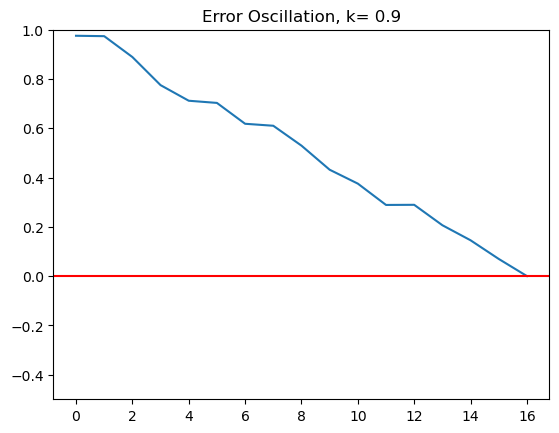

In [7]:
F_set, G_set = generate_vector_pairs(n, dim)
A_i = [ outer_product(F_set[i], G_set[i], dim) for i in range(n) ]

A = np.zeros((dim,dim))
for i in range(n):
    A = np.add(A, A_i[i])
    
G_prime = [ A.dot(F_set[i]) for i in range(n) ]
dot_products = [ np.sum(G_prime[i] * G_set[i]) for i in range(n) ]

print("Mean of Dot Products: ", round(np.mean(dot_products),6))
print("Standard Deviation of Dot Products: ", round(np.std(dot_products),6))

learned = np.zeros(n)
count = 1
converged = False
oscillate_input = False
errorThreshold = 0.000001;
Errors = []
k = 0.85

while converged == False:
    mse = 0
    # Pick a random pair of f and g vectors
    x = np.random.randint(low=0, high=n)
    if x > n:
        x = 1
    f = F_set[x]
    g = G_set[x]
    
    g_prime = A.dot(f)
    
    
    learned[x] = 1
    new_error = 0 

    
    k = k - .05
    deltaA, error = Widrow_Hoff(k, g, g_prime, f, dim)
    
    error_length = np.linalg.norm(error)
    Errors.append(error_length)
    #print(avg_error)
    
    #print("Current Error:", (np.linalg.norm(error) - new_error)/np.linalg.norm(error))
    print("Current Error:", error_length)
    
    #if (abs(np.linalg.norm(error) - new_error) / np.linalg.norm(error) < errorThreshold) and (sum(learned) == n):
    if (abs(error_length) < errorThreshold) :
        print("Error: ", abs(np.linalg.norm(error) - new_error) / np.linalg.norm(error))
        print("Error Threshold: ", errorThreshold)
        print("Number of trials: ", n)
        converged = True
        
    
    A = np.add(A, deltaA)
    count = count + 1;
    x = x + 1;
    
plt.plot(Errors,'-')
plt.ylim(-0.5,1)
plt.axhline(y=0,color="red")
plt.title("Error Oscillation, k= 0.9")
plt.show()

In [ ]:
dim = 100
n = 60 

F_set, G_set = generate_vector_pairs(n, dim)
A_i = [ outer_product(F_set[i], G_set[i], dim) for i in range(n) ]

A = np.zeros((dim,dim))
for i in range(n):
    A = np.add(A, A_i[i])
    
G_prime = [ A.dot(F_set[i]) for i in range(n) ]
dot_products = [ np.sum(G_prime[i] * G_set[i]) for i in range(n) ]

print("Mean of Dot Products: ", round(np.mean(dot_products),6))
print("Standard Deviation of Dot Products: ", round(np.std(dot_products),6))

learned = np.zeros(n)
count = 1
converged = False
oscillate_input = False
errorThreshold = 0.000001;
Errors = []
k = 0.85

while converged == False:
    mse = 0
    # Pick a random pair of f and g vectors
    x = np.random.randint(low=0, high=n)
    if x > n:
        x = 1
    f = F_set[x]
    g = G_set[x]
    
    g_prime = A.dot(f)
    
    
    learned[x] = 1
    new_error = 0 

    
    k = k - .05
    deltaA, error = Widrow_Hoff(k, g, g_prime, f, dim)
    
    error_length = np.linalg.norm(error)
    Errors.append(error_length)
    #print(avg_error)
    
    #print("Current Error:", (np.linalg.norm(error) - new_error)/np.linalg.norm(error))
    print("Current Error:", error_length)
    
    #if (abs(np.linalg.norm(error) - new_error) / np.linalg.norm(error) < errorThreshold) and (sum(learned) == n):
    if (abs(error_length) < errorThreshold) :
        print("Error: ", abs(np.linalg.norm(error) - new_error) / np.linalg.norm(error))
        print("Error Threshold: ", errorThreshold)
        print("Number of trials: ", n)
        converged = True
        
    
    A = np.add(A, deltaA)
    count = count + 1;
    x = x + 1;
    
plt.plot(Errors,'-')
plt.ylim(-0.5,1)
plt.axhline(y=0,color="red")
plt.title("Error Oscillation, k= 0.9")
plt.show()

In [ ]:
dim = 100
n = 80 

F_set, G_set = generate_vector_pairs(n, dim)
A_i = [ outer_product(F_set[i], G_set[i], dim) for i in range(n) ]

A = np.zeros((dim,dim))
for i in range(n):
    A = np.add(A, A_i[i])
    
G_prime = [ A.dot(F_set[i]) for i in range(n) ]
dot_products = [ np.sum(G_prime[i] * G_set[i]) for i in range(n) ]

print("Mean of Dot Products: ", round(np.mean(dot_products),6))
print("Standard Deviation of Dot Products: ", round(np.std(dot_products),6))

learned = np.zeros(n)
count = 1
converged = False
oscillate_input = False
errorThreshold = 0.000001;
Errors = []
k = 0.85

while converged == False:
    mse = 0
    # Pick a random pair of f and g vectors
    x = np.random.randint(low=0, high=n)
    if x > n:
        x = 1
    f = F_set[x]
    g = G_set[x]
    
    g_prime = A.dot(f)
    
    
    learned[x] = 1
    new_error = 0 

    
    k = k - .05
    deltaA, error = Widrow_Hoff(k, g, g_prime, f, dim)
    
    error_length = np.linalg.norm(error)
    Errors.append(error_length)
    #print(avg_error)
    
    #print("Current Error:", (np.linalg.norm(error) - new_error)/np.linalg.norm(error))
    print("Current Error:", error_length)
    
    #if (abs(np.linalg.norm(error) - new_error) / np.linalg.norm(error) < errorThreshold) and (sum(learned) == n):
    if (abs(error_length) < errorThreshold) :
        print("Error: ", abs(np.linalg.norm(error) - new_error) / np.linalg.norm(error))
        print("Error Threshold: ", errorThreshold)
        print("Number of trials: ", n)
        converged = True
        
    
    A = np.add(A, deltaA)
    count = count + 1;
    x = x + 1;
    
plt.plot(Errors,'-')
plt.ylim(-0.5,1)
plt.axhline(y=0,color="red")
plt.title("Error Oscillation, k= 0.9")
plt.show()